<a href="https://colab.research.google.com/github/sridevibonthu/FML/blob/main/Logistic_Regression_Handwriting_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#import the packages

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

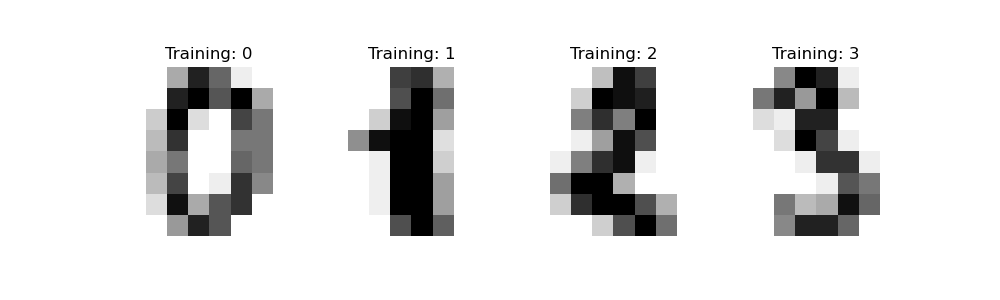

In [24]:
#get data directly from scikit-learn
X, y = load_digits(return_X_y=True)

In [25]:
X.shape, y.shape

((1797, 64), (1797,))

In [26]:
X[0], y[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]), 0)

In [27]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
#split the data
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=0)

####Scale Data
Standardization is the process of transforming data in a way such that the mean of each column becomes equal to zero, and the standard deviation of each column is one. This way, you obtain the same scale for all columns. Take the following steps to standardize your data:

- Calculate the mean and standard deviation for each column.
= Subtract the corresponding mean from each element.
- Divide the obtained difference by the corresponding standard deviation.

It’s a good practice to standardize the input data that you use for logistic regression, although in many cases it’s not necessary. Standardization might improve the performance of your algorithm. It helps if you need to compare and interpret the weights. It’s important when you apply penalization because the algorithm is actually penalizing against the large values of the weights.

You can standardize your inputs by creating an instance of StandardScaler and calling .fit_transform() on it:

In [29]:
X_train[0], np.mean(X_train[0]), np.std(X_train[0])

(array([ 0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16., 11.,
         1.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  2.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  4.,  4.,  0.,
         0.,  0.,  2., 15., 16., 16., 14., 10.,  1.,  0.,  0.,  9., 16.,
         7.,  3., 15.,  6.,  0.,  0.,  0.,  7., 15., 16., 16.,  6.]),
 5.375,
 6.3356629487370935)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [31]:
X_train[0], np.mean(X_train[0]), np.std(X_train[0])

(array([ 0.        , -0.33790435, -1.09141592, -0.64913206,  0.73480922,
        -0.6782652 , -0.40764783, -0.12238102, -0.05576317, -0.62606288,
        -0.99058772,  0.99749054,  0.13213489, -1.19579353, -0.51556231,
        -0.12605859, -0.03733267, -0.72296123,  0.55610538,  1.38118964,
        -0.98465664, -1.26284019, -0.55465252, -0.11565628, -0.02638899,
        -0.15208278,  1.10759523,  0.37163491, -1.60830723, -1.28974179,
        -0.63555933, -0.04573894,  0.        , -0.10276083,  1.32734049,
         0.31000002, -1.05452978, -0.80512633, -0.83498919,  0.        ,
        -0.05806465,  0.13008703,  1.23225418,  1.35913603,  1.32341669,
         1.01539823,  1.51779287,  3.19368333, -0.03963009, -0.40398151,
         0.25100815,  1.22276113, -0.47996928, -0.96182318,  2.3466476 ,
         6.15487177, -0.02638899, -0.30140625, -1.0865776 , -1.14418634,
         0.65337948,  1.58325794,  3.53125595,  3.30213343]),
 0.221929014610994,
 1.3327685970226733)

In [32]:
#create a model and train it
model = LogisticRegression(C=0.05, multi_class='ovr',random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0)

In [34]:
#evaluate the model
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


In [35]:
model.score(X_train, y_train)

0.9707724425887265

In [36]:
model.score(X_test, y_test)

0.9555555555555556

In [37]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  1,  0,  1,  2],
       [ 0,  0, 35,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  1,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 38]])

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.89      0.90        35
           2       0.97      0.97      0.97        36
           3       0.97      1.00      0.98        29
           4       0.97      0.97      0.97        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.93      0.97      0.95        39
           8       0.95      0.90      0.92        39
           9       0.93      0.93      0.93        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

